# Interactive Widgets in IJulia

IPython 2.0 introduced interactive widgets, which are basically:

* Javascript widgets (sliders, buttons, etcetera)
* A communications protocol for the widgets to talk to the kernel
* A Python interface to create and manipulate these.

Thanks to fantastic work by a Google Summer of Code student, [Shashi Gowda](https://github.com/shashi/), the same features are accessible from a Julia interface.

In [1]:
using Interact

In [2]:
@manipulate for n in 1:100
    rand(n,n)
end

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"n",50,1:100,true)

50x50 Array{Float64,2}:
 0.2744     0.658081   0.357268   …  0.640755   0.858389   0.408651  
 0.906766   0.0913524  0.603772      0.675245   0.311778   0.274435  
 0.238604   0.708858   0.124889      0.327806   0.728642   0.217951  
 0.711844   0.70349    0.182912      0.636855   0.0936324  0.460768  
 0.905727   0.346835   0.371355      0.0482039  0.210374   0.590046  
 0.981977   0.25433    0.556125   …  0.747529   0.0734597  0.826081  
 0.129242   0.0933683  0.0760227     0.941142   0.479988   0.628485  
 0.882593   0.363313   0.538152      0.0362779  0.563293   0.69553   
 0.0628573  0.645625   0.923794      0.198154   0.691527   0.209142  
 0.581882   0.686953   0.390823      0.174112   0.461502   0.43817   
 0.590119   0.195076   0.65873    …  0.705743   0.428541   0.862039  
 0.735897   0.860987   0.120992      0.154482   0.850719   0.88409   
 0.882374   0.073021   0.99751       0.0586557  0.960649   0.00816542
 ⋮                                ⋱                               

In [3]:
using Colors
@manipulate for r in 0:0.1:1, g in 0:0.1:1, b in 0:0.1:1, n in 1:100
    linspace(RGB(0.0,0.0,0.0), RGB(r,g,b), n)
end

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"r",0.5,0.0:0.1:1.0,true)

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"g",0.5,0.0:0.1:1.0,true)

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"b",0.5,0.0:0.1:1.0,true)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"n",50,1:100,true)

50-element Array{ColorTypes.RGB{Float64},1}:
 RGB{Float64}(0.0,0.0,0.0)                  
 RGB{Float64}(0.0102041,0.0102041,0.0102041)
 RGB{Float64}(0.0204082,0.0204082,0.0204082)
 RGB{Float64}(0.0306122,0.0306122,0.0306122)
 RGB{Float64}(0.0408163,0.0408163,0.0408163)
 RGB{Float64}(0.0510204,0.0510204,0.0510204)
 RGB{Float64}(0.0612245,0.0612245,0.0612245)
 RGB{Float64}(0.0714286,0.0714286,0.0714286)
 RGB{Float64}(0.0816327,0.0816327,0.0816327)
 RGB{Float64}(0.0918367,0.0918367,0.0918367)
 RGB{Float64}(0.102041,0.102041,0.102041)   
 RGB{Float64}(0.112245,0.112245,0.112245)   
 RGB{Float64}(0.122449,0.122449,0.122449)   
 ⋮                                          
 RGB{Float64}(0.387755,0.387755,0.387755)   
 RGB{Float64}(0.397959,0.397959,0.397959)   
 RGB{Float64}(0.408163,0.408163,0.408163)   
 RGB{Float64}(0.418367,0.418367,0.418367)   
 RGB{Float64}(0.428571,0.428571,0.428571)   
 RGB{Float64}(0.438776,0.438776,0.438776)   
 RGB{Float64}(0.44898,0.44898,0.44898)      
 RGB{Float

In [4]:
using PyPlot

Interact.Slider{Float64}(Signal{Float64}(2.5, nactions=0),"α",2.5,1.0:0.1:4.0,true)

Interact.Slider{Float64}(Signal{Float64}(2.5, nactions=0),"β",2.5,1.0:0.1:4.0,true)

Interact.Textbox{AbstractString}(Signal{AbstractString}(a funny plot, nactions=0),"leg",nothing,"a funny plot")

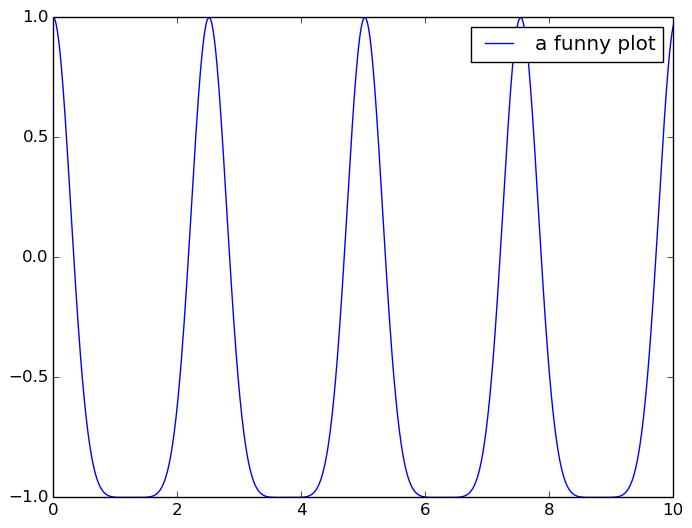

In [5]:
x = linspace(0,10,1000)
clf()
f = figure()
@manipulate for α = 1:0.1:4, β = 1:0.1:4, leg="a funny plot"
    withfig(f) do
        plot(x, cos(α*x + sin(β*x)))
        legend([leg])
    end
end

Interact.Slider{Int64}(Signal{Int64}(10, nactions=0),"n",10,0:20,true)

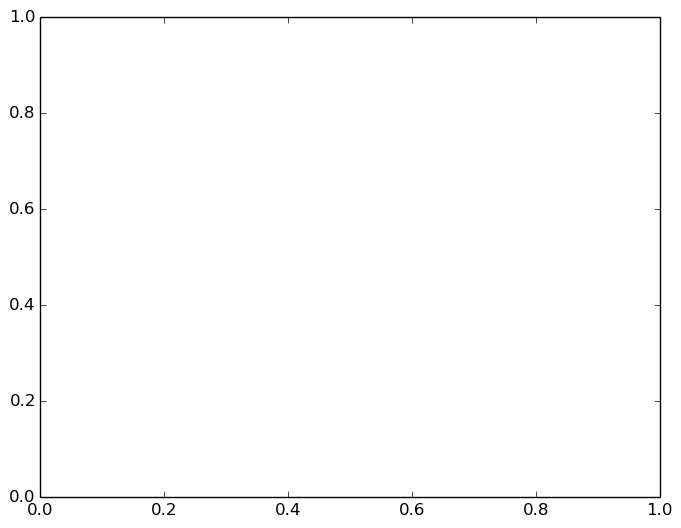

Interact.Latex("","\$\$32 \\left(- 32 x^{10} \\sin{\\left (x^{2} \\right )} + 720 x^{8} \\cos{\\left (x^{2} \\right )} + 5040 x^{6} \\sin{\\left (x^{2} \\right )} - 12600 x^{4} \\cos{\\left (x^{2} \\right )} - 9450 x^{2} \\sin{\\left (x^{2} \\right )} + 945 \\cos{\\left (x^{2} \\right )}\\right)\$\$")

In [7]:
using SymPy
x = Sym("x")
@manipulate for n=0:20
    latex(SymPy.diff(sin(x^2), x, n))
end